<a href="https://colab.research.google.com/github/PurraSujay/MachineLearning-Projects/blob/main/KNN_Classification_on_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN (K Nearest Neighbors) Classification using Iris data set**

**import Libraries!**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

**we have feature names and target names. we are predicting the new feature into the data, so that KNN will classify the new feature based on similarity measure!**

In [2]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [12]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:

df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


we have divided the data frame into parts according to the similar classes

In [14]:

df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

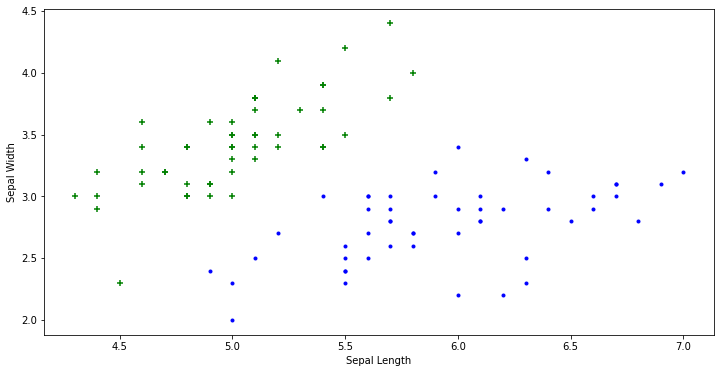

In [18]:
plt.figure(figsize=(12,6))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')


Petal length vs Pepal Width (Setosa vs Versicolor)

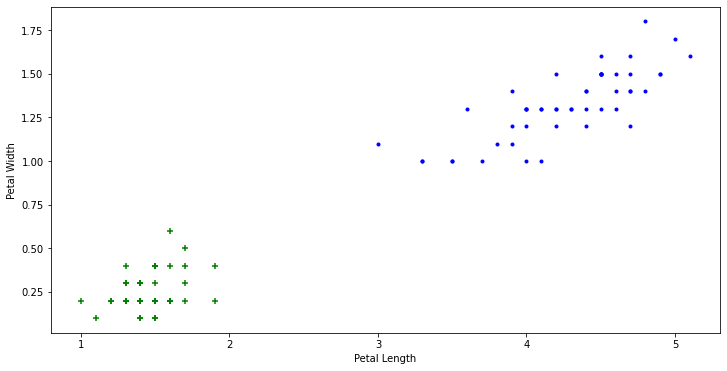

In [19]:
plt.figure(figsize=(12,6))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

**Train test split**

In [21]:

from sklearn.model_selection import train_test_split

In [22]:

X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [25]:

len(X_train), len(X_test)

(120, 30)


**Create KNN (K Neighrest Neighbour Classifier)**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [29]:
knn.score(X_test, y_test)

0.9666666666666667

In [31]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

**Plot Confusion Matrix**

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

Text(69.0, 0.5, 'Truth')

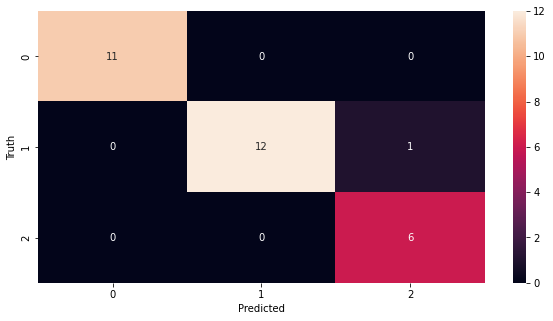

In [37]:

plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Print classification report for precesion, recall and f1-score for each classes**

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

